**2.** В файле task_2.csv построчно приведены записи событий установки приложения (install) и начала сессии (login). В столбце player_id указан 
уникальный id пользователя, в столбце event_timestamp - время события (unix
timestamp UTC).

Удержание первого дня определяется как доля уникальных пользователей, отправивших событие login на следующий календарный день, среди всех
пользователей, отправивших событие install в текущий календарный день. Например, если 1 сентября 100 пользователей скачали приложение, и 50 из них
совершили логин 2 сентября, удержание первого дня для 1 сентября составляет 50%.

Удержание первого дня для периода дат определяется как отношение общего числа уникальных пользователей, вернувшихся в приложение на следующий
день после дня установки, к общему числу уникальных пользователей, совершивших установку в рамках заданного периода дат.
Например, если 2 сентября 200 пользователей скачали приложение, и 75 из них совершили логин 3 сентября, удержание первого дня за период 1-2 сентября
составляет:
(50 + 75)/(100 + 200) ≈ 42%
Можно ли с уверенностью утверждать, что удержание первого дня за период с 15 по 18 сентября выше, чем удержание первого дня за период с 19 по 22 сентября?

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import files
uploaded = files.upload()

Saving task_2.csv to task_2.csv


In [4]:
df = pd.read_csv('task_2.csv',sep=',')
df

,player_id,event_timestamp,event_name
0,1058930,1632265733,install
1,1055681,1632412526,login
2,1057784,1632411775,login
3,1015250,1631923078,login
4,1040648,1631670785,login
...,...,...,...
52538,1060090,1632338669,install
52539,1061249,1632403477,install
52540,1062028,1632436754,install
52541,1050142,1631918819,login


In [5]:
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'], unit='s').dt.date
df['event_timestamp']

0        2021-09-21
1        2021-09-23
2        2021-09-23
3        2021-09-17
4        2021-09-15
            ...    
52538    2021-09-22
52539    2021-09-23
52540    2021-09-23
52541    2021-09-17
52542    2021-09-16
Name: event_timestamp, Length: 52543, dtype: object

In [6]:
df1 = df[df['event_name'] == 'install']
df1 = df1.rename(columns={'event_timestamp': 'install_day'})
df1.drop('event_name', axis=1)

,player_id,install_day
0,1058930,2021-09-21
6,1055624,2021-09-20
8,1060568,2021-09-22
12,1059704,2021-09-22
16,1051625,2021-09-18
...,...,...
52528,1008033,2021-09-21
52533,1004102,2021-09-22
52538,1060090,2021-09-22
52539,1061249,2021-09-23


In [7]:
df2 = df[df['event_name'] == 'login']
df2 = df2.rename(columns={'event_timestamp': 'login_day'})
df2.drop('event_name', axis=1)

,player_id,login_day
1,1055681,2021-09-23
2,1057784,2021-09-23
3,1015250,2021-09-17
4,1040648,2021-09-15
5,1049800,2021-09-17
...,...,...
52535,1053299,2021-09-20
52536,1022721,2021-09-23
52537,1053523,2021-09-19
52541,1050142,2021-09-17


In [8]:
df3 = df1.merge(df2, left_on="player_id", right_on="player_id", how="left").drop(['event_name_x','event_name_y'], axis=1)
df3

,player_id,install_day,login_day
0,1058930,2021-09-21,2021-09-23
1,1058930,2021-09-21,2021-09-22
2,1055624,2021-09-20,2021-09-20
3,1060568,2021-09-22,2021-09-22
4,1060568,2021-09-22,2021-09-23
...,...,...,...
32929,1004102,2021-09-22,2021-09-23
32930,1004102,2021-09-22,2021-09-23
32931,1060090,2021-09-22,2021-09-22
32932,1061249,2021-09-23,NaN


In [9]:
df4 = df3.groupby(["install_day","login_day"])["player_id"].nunique().reset_index().rename(columns={'player_id': 'count'})
df4.head(10)

,install_day,login_day,count
0,2021-09-15,2021-09-15,745
1,2021-09-15,2021-09-16,428
2,2021-09-15,2021-09-17,247
3,2021-09-15,2021-09-18,174
4,2021-09-15,2021-09-19,140
5,2021-09-15,2021-09-20,85
6,2021-09-15,2021-09-21,71
7,2021-09-15,2021-09-22,72
8,2021-09-15,2021-09-23,44
9,2021-09-16,2021-09-16,736


In [10]:
df4['install_day'] = pd.to_datetime(df4['install_day'],format='%Y-%m-%d')
df4['login_day'] = pd.to_datetime(df4['login_day'],format='%Y-%m-%d')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   install_day  45 non-null     datetime64[ns]
 1   login_day    45 non-null     datetime64[ns]
 2   count        45 non-null     int64         
dtypes: datetime64[ns](2), int64(1)
memory usage: 1.2 KB


In [11]:
df5 = df4.loc[df4['install_day'].isin(['2021-09-15','2021-09-16','2021-09-17','2021-09-18'])]
df5.groupby("install_day")["count"].sum()

install_day
2021-09-15    2006
2021-09-16    1864
2021-09-17    2050
2021-09-18    2292
Name: count, dtype: int64

In [12]:
from datetime import timedelta, datetime
one_day = timedelta(1)

In [13]:
df6 = df5[df5['login_day'] == df5['install_day'] +  timedelta(1)]
df6

,install_day,login_day,count
1,2021-09-15,2021-09-16,428
10,2021-09-16,2021-09-17,398
18,2021-09-17,2021-09-18,495
25,2021-09-18,2021-09-19,566


In [14]:
retention_15_18 = sum(df6['count']) / sum(df5['count'])
retention_15_18 

0.22978567949342427

In [15]:
df7 = df4.loc[df4['install_day'].isin(['2021-09-19','2021-09-20','2021-09-21','2021-09-22'])]
df7.groupby("install_day")["count"].sum()

install_day
2021-09-19    2016
2021-09-20    1556
2021-09-21    1929
2021-09-22    1079
Name: count, dtype: int64

In [16]:
df8 = df7[df7['login_day'] == df7['install_day'] +  timedelta(1)]
df8

,install_day,login_day,count
31,2021-09-19,2021-09-20,509
36,2021-09-20,2021-09-21,404
40,2021-09-21,2021-09-22,523
43,2021-09-22,2021-09-23,358


In [17]:
retention_19_22 = sum(df8['count']) / sum(df7['count'])
retention_19_22 

0.27264437689969606

In [19]:
if retention_15_18 > retention_19_22 : print('ОТВЕТ: Retention 15-18 дня больше, чем retention 19-22 дня')
else: print('ОТВЕТ: Retention 19-22 дня больше, чем retention 15-18 дня')

ОТВЕТ: Retention 19-22 дня больше, чем retention 15-18 дня


**3.** В файле task_3.csv построчно приведены записи транзакций, совершенных в
приложении когортой пользователей. В столбце event_timestamp указано время
транзакции (unix timestamp UTC), в столбце registration_timestamp - дата
регистрации пользователя, в столбце inapp_size - размер соответствующего
платежа (сумма $).
Требуется построить кривую накопительной суммы платежей когорты по дням с
момента регистрации (один день - одна точка на кривой). На основании
полученных данных построить и отобразить в виде другой кривой на том же
графике прогноз значений накопительной суммы для дней жизни с 90 по 180.

In [20]:
from google.colab import files
uploaded = files.upload()

Saving task_3.csv to task_3.csv


In [74]:
ddf = pd.read_csv('task_3.csv',sep=',')
ddf

,event_timestamp,registration_timestamp,inapp_size
0,1611154038,1610971359,5
1,1611759898,1610972522,3
2,1611057594,1610974545,5
3,1611562555,1610976251,3
4,1611082290,1610976461,3
...,...,...,...
11572,1611556376,1610970090,3
11573,1611556310,1610970090,3
11574,1611592979,1610970090,1
11575,1611116708,1610970537,3


Подготовим данные. Переведем таймстемп в дату, вычислим для каждой строки, сколько прошло дней после регистрации.

In [75]:
ddf['event_timestamp'] = pd.to_datetime(ddf['event_timestamp'], unit='s').dt.date
ddf['event_timestamp']

0        2021-01-20
1        2021-01-27
2        2021-01-19
3        2021-01-25
4        2021-01-19
            ...    
11572    2021-01-25
11573    2021-01-25
11574    2021-01-25
11575    2021-01-20
11576    2021-01-20
Name: event_timestamp, Length: 11577, dtype: object

In [76]:
ddf['registration_timestamp'] = pd.to_datetime(ddf['registration_timestamp'], unit='s').dt.date
ddf['registration_timestamp']

0        2021-01-18
1        2021-01-18
2        2021-01-18
3        2021-01-18
4        2021-01-18
            ...    
11572    2021-01-18
11573    2021-01-18
11574    2021-01-18
11575    2021-01-18
11576    2021-01-18
Name: registration_timestamp, Length: 11577, dtype: object

In [77]:
ddf.head()

,event_timestamp,registration_timestamp,inapp_size
0,2021-01-20,2021-01-18,5
1,2021-01-27,2021-01-18,3
2,2021-01-19,2021-01-18,5
3,2021-01-25,2021-01-18,3
4,2021-01-19,2021-01-18,3


In [78]:
ddf['days_since_start'] = (ddf['event_timestamp'] - ddf['registration_timestamp']).dt.days
ddf

,event_timestamp,registration_timestamp,inapp_size,days_since_start
0,2021-01-20,2021-01-18,5,2
1,2021-01-27,2021-01-18,3,9
2,2021-01-19,2021-01-18,5,1
3,2021-01-25,2021-01-18,3,7
4,2021-01-19,2021-01-18,3,1
...,...,...,...,...
11572,2021-01-25,2021-01-18,3,7
11573,2021-01-25,2021-01-18,3,7
11574,2021-01-25,2021-01-18,1,7
11575,2021-01-20,2021-01-18,3,2


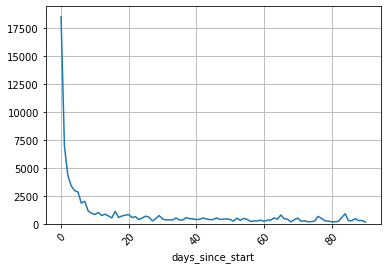

In [79]:
ddf.groupby('days_since_start')['inapp_size'].sum().plot(rot=45, ylim=0, grid=True)

Игроки в основном совершают платеж в первые 5 дней после регистрации, за это время идет сильный спад. После отвала непостоянных игроков после ~20 дня, кривая накопительной суммы имеет примерно один уровень. 

Построим прогнозные модели. Для прогноза выберем модели, у которых наименьшее значение среднеквадратичной ошибки. 

In [105]:
ddf1 = ddf.groupby('days_since_start')['inapp_size'].sum().reset_index()
ddf1

,days_since_start,inapp_size
0,0,18491
1,1,6933
2,2,4341
3,3,3397
4,4,2978
...,...,...
86,86,286
87,87,467
88,88,300
89,89,299


In [81]:
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

In [82]:
train=ddf1[0:72]
test=ddf1[72:90]

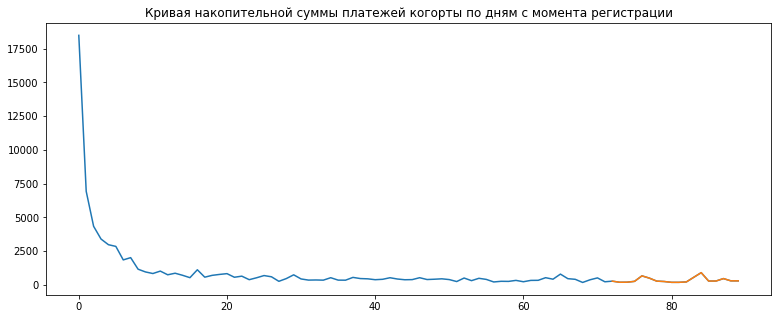

In [128]:
train.inapp_size.plot(figsize=(13,5), fontsize=10)
test.inapp_size.plot(figsize=(13,5), title= 'Кривая накопительной суммы платежей когорты по дням с момента регистрации', fontsize=10)
plt.show()

1. Наивный подход

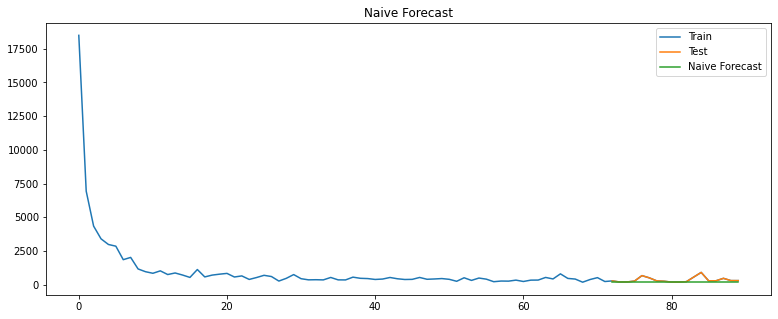

In [127]:
dd= np.asarray(ddf1.inapp_size)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(13,5))
plt.plot(train.index, train['inapp_size'], label='Train')
plt.plot(test.index,test['inapp_size'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.inapp_size, y_hat.naive))
print(rms)

268.93762184648773


2. Простое среднее

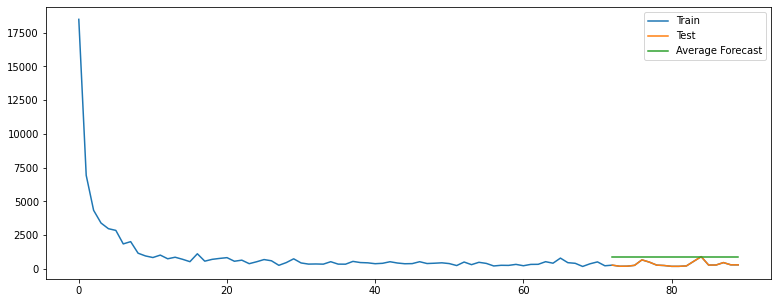

In [126]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['inapp_size'].mean()
plt.figure(figsize=(13,5))
plt.plot(train['inapp_size'], label='Train')
plt.plot(test['inapp_size'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [87]:
rms = sqrt(mean_squared_error(test.inapp_size, y_hat_avg.avg_forecast))
print(rms)

721.0421903590509


3. Скользящее среднее

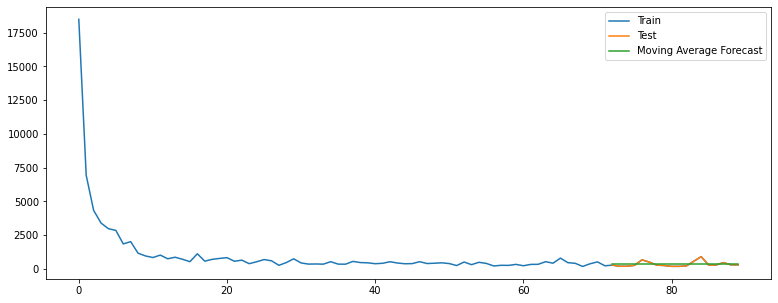

In [125]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast']=train['inapp_size'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(13,5))
plt.plot(train['inapp_size'], label='Train')
plt.plot(test['inapp_size'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [89]:
rms=sqrt(mean_squared_error(test.inapp_size, y_hat_avg.moving_avg_forecast))
print(rms)

227.1297353202937


4. Простое экспоненциальное сглаживание

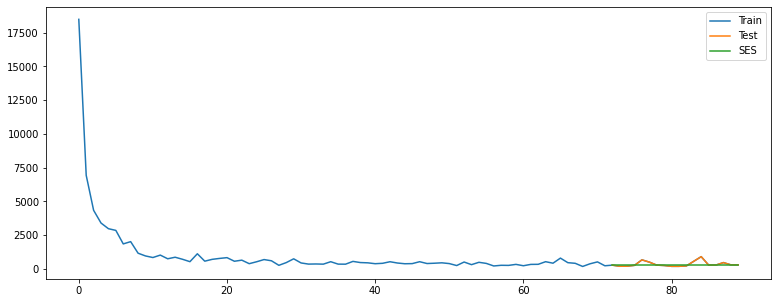

In [124]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2=SimpleExpSmoothing(np.asarray(train['inapp_size'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(13,5))
plt.plot(train['inapp_size'], label='Train')
plt.plot(test['inapp_size'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [91]:
rms = sqrt(mean_squared_error(test.inapp_size, y_hat_avg.SES))
print(rms)

193.15024542840678


5. Метод Холта-Винтера

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters/model.py:922: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


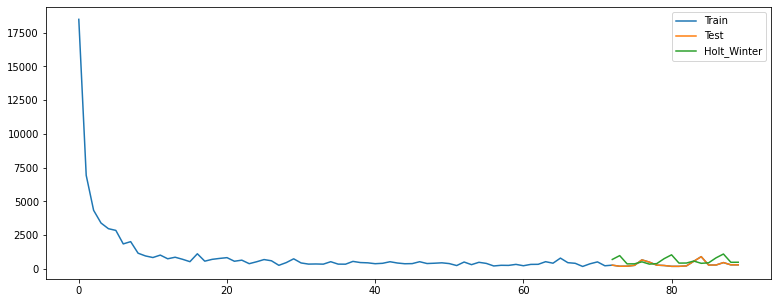

In [123]:
y_hat_avg = test.copy()
fit1=ExponentialSmoothing(np.asarray(train['inapp_size']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))
plt.figure(figsize=(13,5))
plt.plot( train['inapp_size'], label='Train')
plt.plot(test['inapp_size'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [93]:
rms = sqrt(mean_squared_error(test.inapp_size, y_hat_avg.Holt_Winter))
print(rms)

259.8034431613787


6. ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


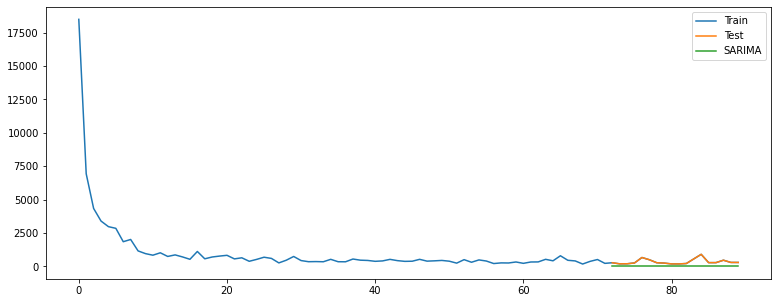

In [122]:
import statsmodels.api as sm
y_hat_avg = test.copy()
fit1=sm.tsa.statespace.SARIMAX(train.inapp_size, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(0, 180, dynamic=True)
plt.figure(figsize=(13,5))
plt.plot( train['inapp_size'], label='Train')
plt.plot(test['inapp_size'], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [95]:
rms = sqrt(mean_squared_error(test.inapp_size, y_hat_avg.SARIMA))
print(rms)

400.25422476776487


Выберем модели с самым наименьшими среднеквадратическими отклонениями (rmse) для прогноза значений. Подготовим данные.

In [96]:
median = ddf1['inapp_size'].median()
median

449.0

In [98]:
ddf2 = ddf1
ddf2

,days_since_start,inapp_size
0,0,18491
1,1,6933
2,2,4341
3,3,3397
4,4,2978
...,...,...
86,86,286
87,87,467
88,88,300
89,89,299


In [99]:
ddf2['days_since_start'] = ddf1['days_since_start'] + 91
ddf2

,days_since_start,inapp_size
0,91,18491
1,92,6933
2,93,4341
3,94,3397
4,95,2978
...,...,...
86,177,286
87,178,467
88,179,300
89,180,299


In [100]:
ddf2.loc[ddf2["inapp_size"] > 0, "inapp_size"] = \
    ddf2.loc[ddf2["inapp_size"] <= 0, "inapp_size"].median()
ddf2

,days_since_start,inapp_size
0,91,NaN
1,92,NaN
2,93,NaN
3,94,NaN
4,95,NaN
...,...,...
86,177,NaN
87,178,NaN
88,179,NaN
89,180,NaN


In [101]:
ddf2['inapp_size'].fillna(median,inplace = True)
ddf2['inapp_size']

0     449.0
1     449.0
2     449.0
3     449.0
4     449.0
      ...  
86    449.0
87    449.0
88    449.0
89    449.0
90    449.0
Name: inapp_size, Length: 91, dtype: float64

In [102]:
ddf2

,days_since_start,inapp_size
0,91,449.0
1,92,449.0
2,93,449.0
3,94,449.0
4,95,449.0
...,...,...
86,177,449.0
87,178,449.0
88,179,449.0
89,180,449.0


In [107]:
ddf3 = pd.concat([ddf1, ddf2], ignore_index=True)
ddf3

,days_since_start,inapp_size
0,0,18491.0
1,1,6933.0
2,2,4341.0
3,3,3397.0
4,4,2978.0
...,...,...
177,177,449.0
178,178,449.0
179,179,449.0
180,180,449.0


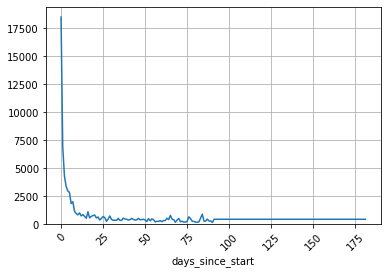

In [108]:
ddf3.groupby('days_since_start')['inapp_size'].sum().plot(rot=45, ylim=0, grid=True)

In [114]:
trainn=ddf3[0:90]
predictt=ddf3[90:180]

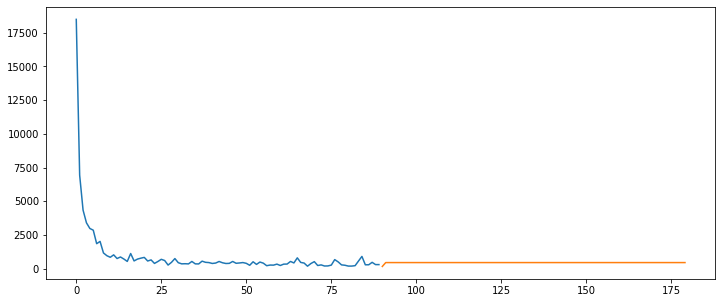

In [115]:
trainn.inapp_size.plot(figsize=(12,5), fontsize=10)
predictt.inapp_size.plot(figsize=(12,5), fontsize=10)
plt.show()

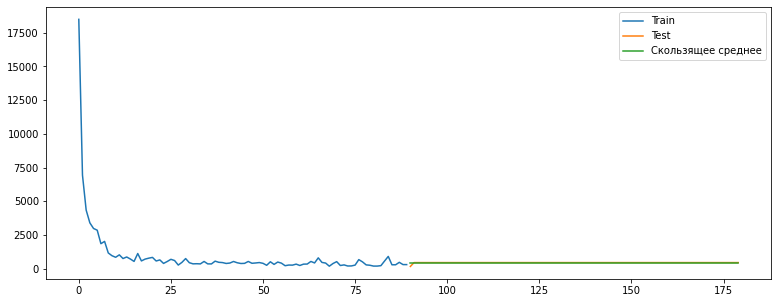

In [133]:
y_hat_avg = predictt.copy()
y_hat_avg['moving_avg_forecast']=trainn['inapp_size'].rolling(60).mean().iloc[-1]
plt.figure(figsize=(13,5))
plt.plot(trainn['inapp_size'], label='Train')
plt.plot(predictt['inapp_size'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Скользящее среднее')
plt.legend(loc='best')
plt.show()

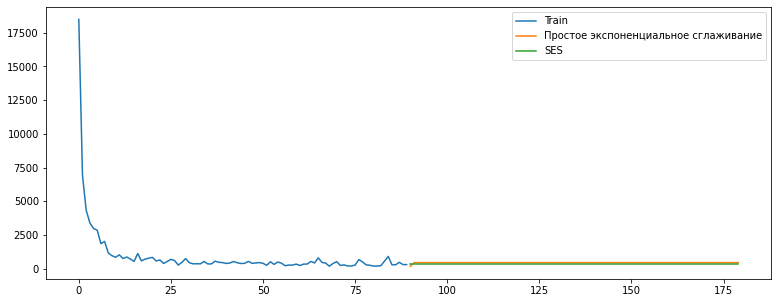

In [135]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = predictt.copy()
fit2=SimpleExpSmoothing(np.asarray(trainn['inapp_size'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(predictt))
plt.figure(figsize=(13,5))
plt.plot(trainn['inapp_size'], label='Train')
plt.plot(predictt['inapp_size'], label='Простое экспоненциальное сглаживание')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

Прогнозное значение у модели скользящего среднего и простого экспоненциального сглаживания близки к медиане с 90 по 180 д.